In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
# Import as Dataframe
#df = pd.read_csv('C://Users//Aniruddha//OneDrive - Infiniti Research//Documents//New folder//bookings.xlsx', engine='python')

xls = pd.ExcelFile('C://Users//Aniruddha//OneDrive - Infiniti Research//Documents//New folder//bookings.xlsx')


In [4]:
df = pd.read_excel(xls, '2016-2017 Bookings')

In [5]:
df.head()

,Hotel Code,Confirm Number,Room Type Code,Status,Day of Conf Date,Day of StayDate,Rate
0,ALG,CI1ONZW3,KING,Confirmed,2016-01-09,2016-01-09,84.15
1,ALG,CI1OOPNI,QUEN,Confirmed,2016-01-09,2016-01-09,84.15
2,ALX,CI1OOOVZ,QQDX,Confirmed,2016-01-09,2016-01-09,182.75
3,BRC,CI1OOVFE,QQDX,Confirmed,2016-01-09,2016-01-09,239.00
4,CHP,CI1ONZIM,KGAD,Cancelled,2016-01-09,2016-01-09,118.15


In [6]:
df.sort_values(by='Day of StayDate')
df.head()

,Hotel Code,Confirm Number,Room Type Code,Status,Day of Conf Date,Day of StayDate,Rate
0,ALG,CI1ONZW3,KING,Confirmed,2016-01-09,2016-01-09,84.15
1,ALG,CI1OOPNI,QUEN,Confirmed,2016-01-09,2016-01-09,84.15
2,ALX,CI1OOOVZ,QQDX,Confirmed,2016-01-09,2016-01-09,182.75
3,BRC,CI1OOVFE,QQDX,Confirmed,2016-01-09,2016-01-09,239.00
4,CHP,CI1ONZIM,KGAD,Cancelled,2016-01-09,2016-01-09,118.15


In [7]:
df.describe()

,Rate
count,667920.000000
mean,274.485164
std,119.446980
min,0.000000
25%,196.670000
50%,253.250000
75%,327.100000
max,3542.860000


In [8]:
r=df.groupby('Room Type Code')['Rate'].apply(list)


In [9]:
df['Room Type Code'].unique()


array(['KING', 'QUEN', 'QQDX', 'KGAD', 'QQPR', 'KGDX', 'CDPR', 'KGST',
       'QNDX', 'DLXE', 'SVKD', 'QNDA', 'QNQN', 'DBDB', 'ECDD', 'KGCN',
       'DBDX', 'KGVW', 'EXKG', 'C1BS', 'CVKG', 'SVKS', 'MNQN', 'MNKG',
       'ALKG', 'KGPW', 'QQST', 'KGDA', 'KGPR', 'MEDS', 'MNQQ', 'CPKG',
       'STQQ', 'PSPT', 'KSPA', 'CYDB', 'CVQQ', 'KST2', 'KPAD', 'CJRS',
       'LVSK', 'CKPA', 'JRAD', 'OFP1', 'ALQN', 'PVQQ', 'QDLX', 'SVQD',
       'QNCL', 'STKG', 'PTMV', 'CVKR', 'CYKG', 'EXQN', 'DDPR', 'KGBY',
       'EXST', 'PVKG', 'QQSL', 'KGSL', 'C1BA', 'PMCS', 'QQDR', 'VIST',
       'OFKG', 'ALQA', 'KPSA', 'KGKT', 'STQA', 'EXQQ', 'KGEX', 'PRST',
       'CVSK', 'WDPR', 'CVKN', 'CYQX', 'KGSF', 'LVKG', 'SKST', 'KSST',
       'DBAD', 'BUNK', 'CVQA', 'CY1B', 'OVDD', 'OF2B', 'KSPC', 'QQPA',
       'YOGA', 'KIAD', 'SPST', 'STDB', 'KSSP', 'KGDR', 'QNPR', 'SQST',
       'CSPA', '1BRF', 'KGCL', 'QNHI', 'MCST', 'WCLK', 'EWKG', 'CVKS',
       'QNSL', 'QQDA', '1BST', 'KGDP', 'STKA', 'QQBY', 'KPST', 'DDCA',
      

In [10]:
r=pd.DataFrame(r)


In [11]:
r.head()

,Rate
Room Type Code,
1BOF,"[519.75, 519.75, 362.57, 362.57, 362.57, 422.6..."
1BPS,"[502.2, 502.2, 502.2, 502.2, 566.1, 566.1, 566..."
1BRF,"[283.5, 283.5, 283.5, 283.5, 283.5, 283.5, 340..."
1BSA,"[369.0, 329.0, 329.0, 369.0, 369.0, 197.1, 541..."
1BSS,"[529.0, 504.0, 504.0, 440.43, 440.43, 440.43, ..."


# Data preprocessing


In [12]:
s = df.resample('MS', on='Day of StayDate')['Rate'].sum()

In [13]:
s=pd.DataFrame(s)
s.head()

,Rate
Day of StayDate,
2016-01-01,658892.62
2016-02-01,2666030.27
2016-03-01,5215119.15
2016-04-01,4909135.30
2016-05-01,6633249.70


In [14]:
s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
Rate    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [15]:
s.reset_index(level=0, inplace=True)

In [16]:
s[0:1]

,Day of StayDate,Rate
0,2016-01-01,658892.62


In [17]:
s

,Day of StayDate,Rate
0,2016-01-01,6.588926e+05
1,2016-02-01,2.666030e+06
2,2016-03-01,5.215119e+06
3,2016-04-01,4.909135e+06
4,2016-05-01,6.633250e+06
5,2016-06-01,6.913184e+06
6,2016-07-01,8.884780e+06
7,2016-08-01,8.385532e+06
8,2016-09-01,7.994005e+06
9,2016-10-01,7.596273e+06


In [18]:
s['Rate']=s['Rate'].round()

In [19]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Day of StayDate    36 non-null datetime64[ns]
Rate               36 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 656.0 bytes


In [20]:
s.isna().any()

Day of StayDate    False
Rate               False
dtype: bool

In [21]:
s.isnull().sum()

Day of StayDate    0
Rate               0
dtype: int64

In [22]:
s.describe()

,Rate
count,3.600000e+01
mean,5.092615e+06
std,3.639542e+06
min,2.473300e+04
25%,1.028731e+06
50%,5.749974e+06
75%,8.091887e+06
max,1.103284e+07


In [23]:
s = s.set_index('Day of StayDate')
s.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Day of StayDate', freq=None)

In [24]:
s.isna().any()

Rate    False
dtype: bool

In [25]:
Forecast=s

# Visualizing furniture sales time series data

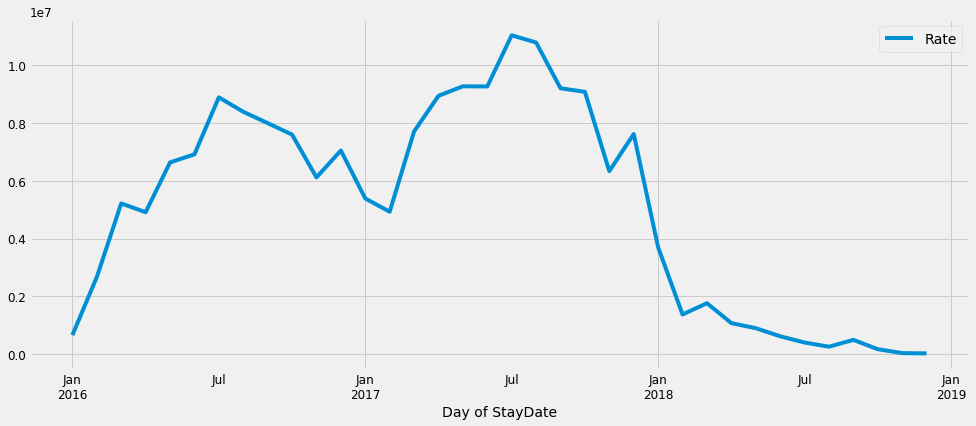

In [26]:
Forecast.plot(figsize=(15, 6))
plt.show()


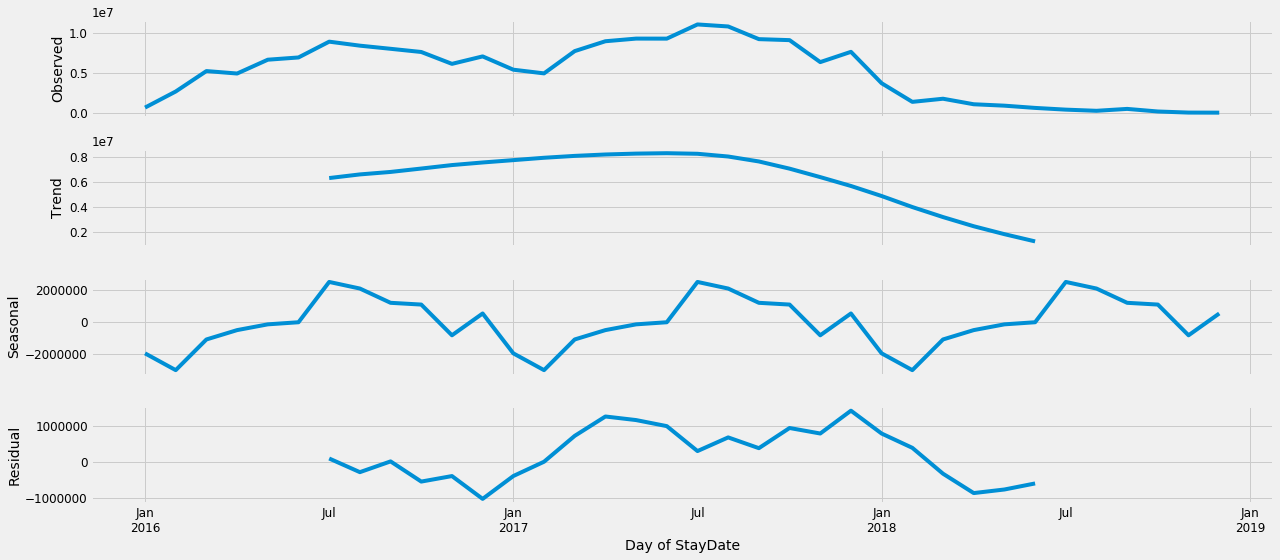

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(Forecast, model='additive')
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our Revenue ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Forecast,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1197.4567163121776
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:786.4145886840583
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:808.3465679544054
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:408.27154304940416
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1141.5170994195887
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:739.1778212815751
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:806.2751213439033
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:405.71236914779695
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1060.5460004456247
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:688.0360763392852
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:714.4041964603789
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:349.43781010198495
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1028.9841299048796
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:657.8912651255143
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:716.2436730612858
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:347.77081751043374
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1094.2882911757677
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:721.6395937187101
A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:690.1321302662523
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:717.616331455367
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:349.64500212639166
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1062.3426053548894
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:687.9696591887183
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:685.4763764745554
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:313.8322799492015
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1026.4930789175908
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:658.2397742088049
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:686.0608306461676
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:314.47876322556095


In [30]:
mod = sm.tsa.statespace.SARIMAX(s,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7763      0.428      1.813      0.070      -0.063       1.615
ma.L1         -0.5834      0.725     -0.805      0.421      -2.004       0.837
ar.S.L12      -1.0507      0.642     -1.636      0.102      -2.309       0.208
sigma2      1.765e+12   1.66e-13   1.07e+25      0.000    1.76e+12    1.76e+12


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

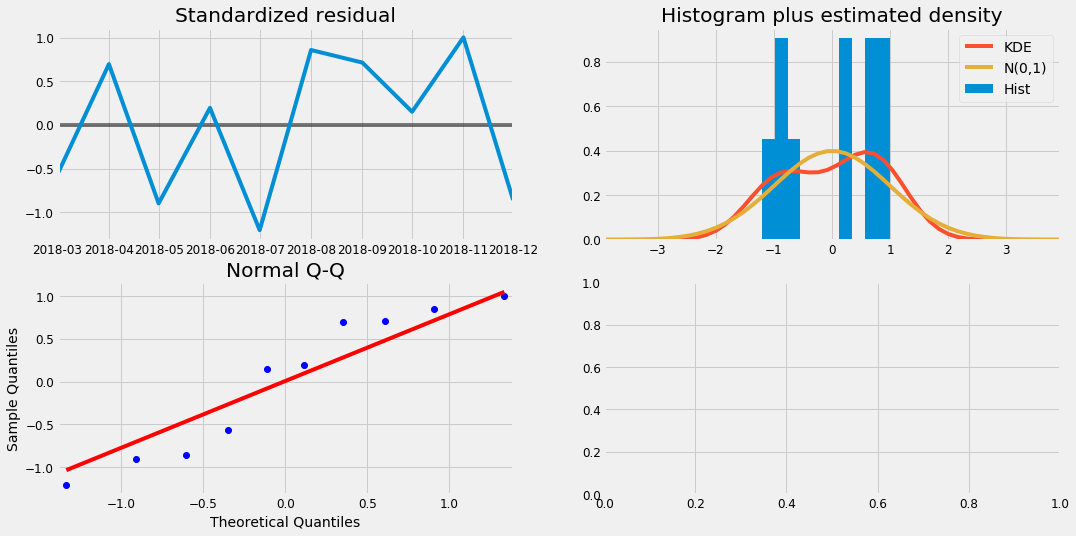

In [31]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts


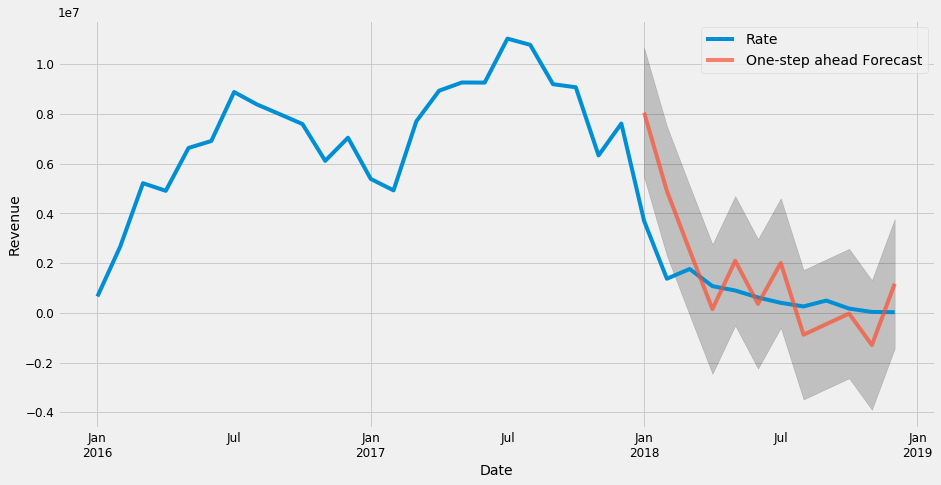

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = s['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()

In [33]:
s_forecasted = pred.predicted_mean
s_truth = s['2018-01-01':]

# Compute the mean square error
mse = ((s_forecasted - s_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
Rate                  NaN
dtype: float64


In [34]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
Rate                  NaN
dtype: float64


# Producing and visualizing forecasts

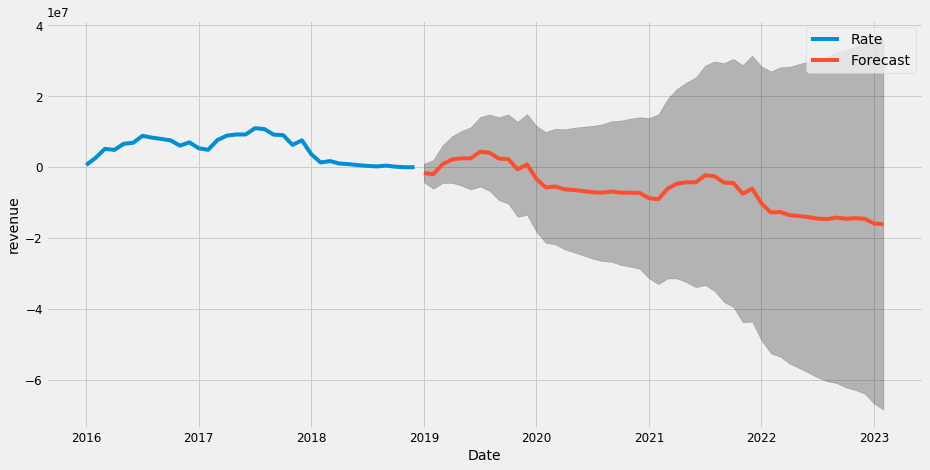

In [35]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

ax = s.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('revenue')

plt.legend()
plt.show()

Expanding & Rolling

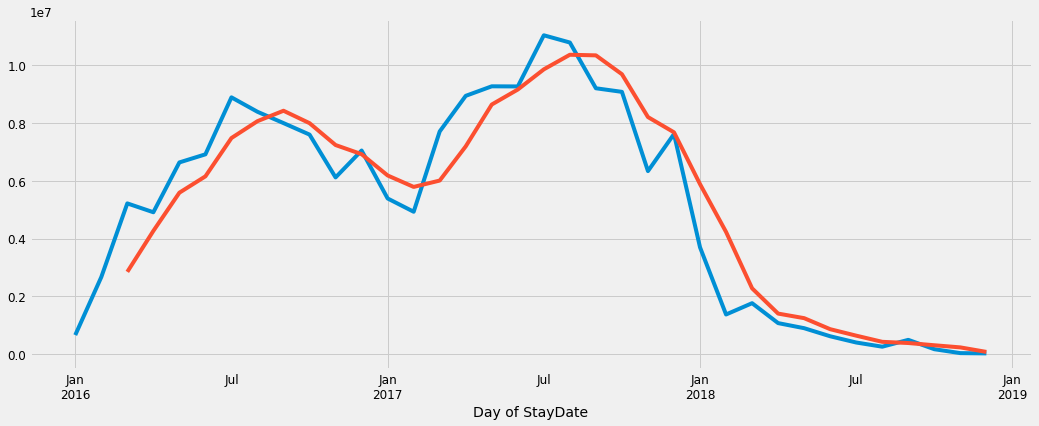

In [36]:
#Rolling Mean
Forecast['Rate'].plot(figsize=(16,6))
Forecast.rolling(window=3).mean()['Rate'].plot()

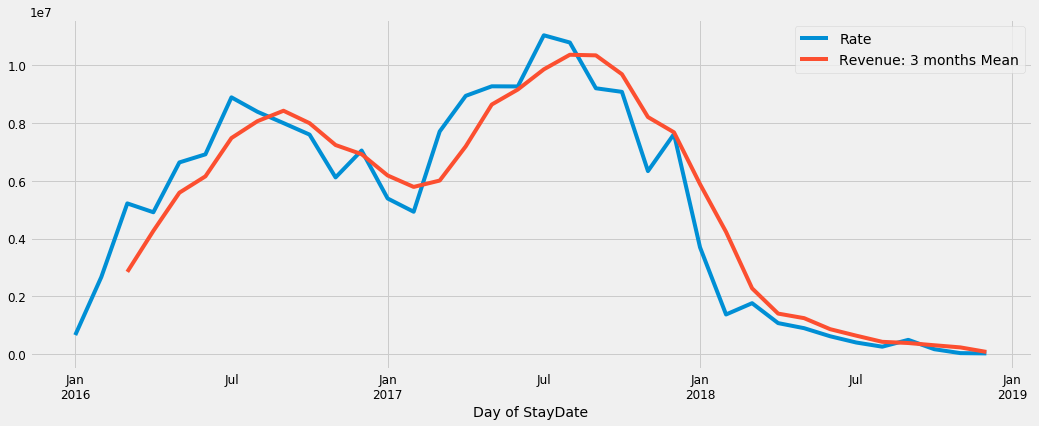

In [37]:
Forecast['Revenue: 3 months Mean'] = Forecast['Rate'].rolling(window=3).mean()
Forecast[['Rate','Revenue: 3 months Mean']].plot(figsize=(16,6))

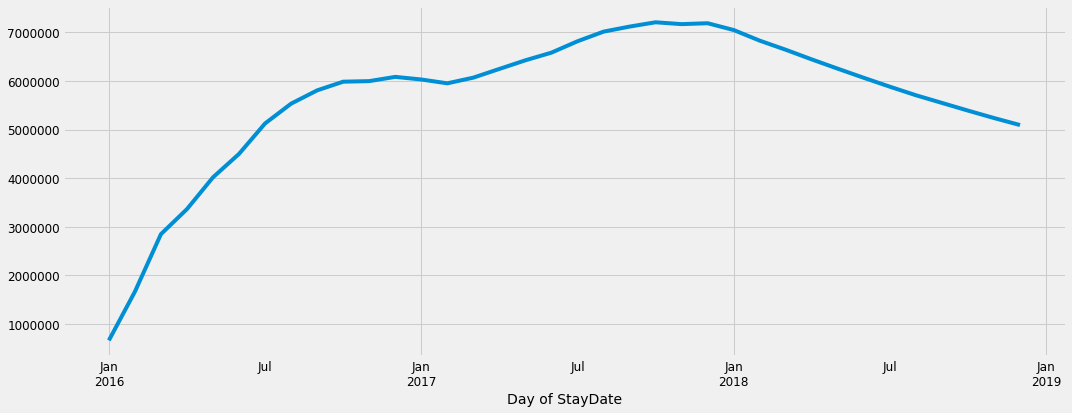

In [38]:
#Expanding
# Optional specify a minimum number of periods
Forecast['Rate'].expanding(min_periods=1).mean().plot(figsize=(16,6))


Bollinger Bands

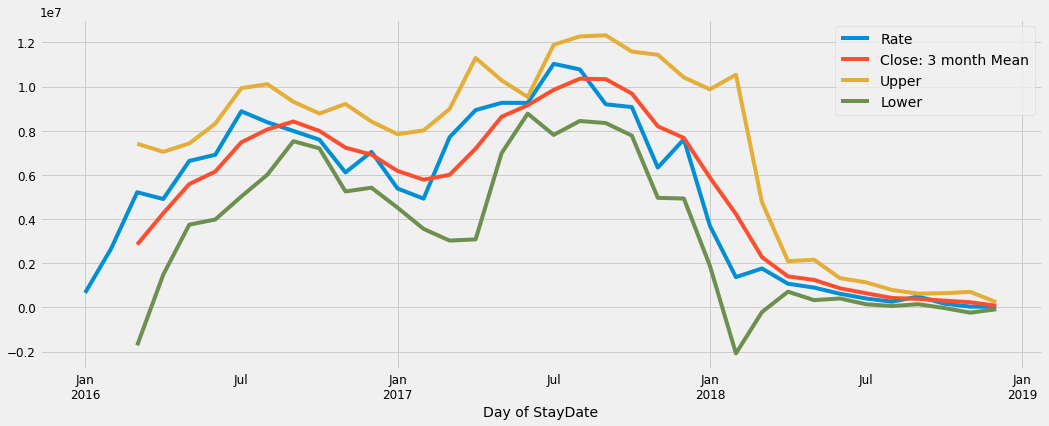

In [39]:
Forecast['Close: 3 month Mean'] = Forecast['Rate'].rolling(window=3).mean()
Forecast['Upper'] = s['Close: 3 month Mean'] + 2*Forecast['Rate'].rolling(window=3).std()
Forecast['Lower'] = s['Close: 3 month Mean'] - 2*Forecast['Rate'].rolling(window=3).std()
Forecast[['Rate','Close: 3 month Mean','Upper','Lower']].plot(figsize=(16,6))